### Week 3 Assignment
### Building a Regression Model for Energy Consumption
#### By Tanmay Roy
<p1>Submission Date : 29/12/2024<p1>

#### __1. Feature Preparation :__ Load the dataset and verify that the dataset has no missing values and all required columns are present.

In [2]:
# Importing libraries
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv(r'.\electric_database_updated.csv')

# Check for missing values and ensure all columns are present
print("Missing values:\n", data.isnull().sum())
required_columns = ['Voltage (V)', 'Current (I)', 'Temperature (°C)', 'Humidity (%)', 'Power_Factor', 'Power (W)']
assert all(col in data.columns for col in required_columns), "Missing required columns!"

# Display first few rows
data.head()


Missing values:
 Timestamp                    0
Voltage (V)                  0
Current (I)                  0
Power (W)                    0
Power_Factor                 0
Temperature (°C)             0
Humidity (%)                 0
Power (W) Normalized         0
Shift                        0
Energy_Efficiency            0
Hour                         0
Humidity_Category            0
Humidity_Category_Encoded    0
dtype: int64


,Timestamp,Voltage (V),Current (I),Power (W),Power_Factor,Temperature (°C),Humidity (%),Power (W) Normalized,Shift,Energy_Efficiency,Hour,Humidity_Category,Humidity_Category_Encoded
0,2024-12-01 00:00:00,222.483571,4.642510,965.023943,0.880626,21.734855,45.494834,0.289070,Night,849.825214,0,Low,1
1,2024-12-01 00:01:00,219.308678,4.206038,894.158159,0.939144,21.734855,46.477508,0.194697,Night,839.743684,0,Low,1
2,2024-12-01 00:02:00,223.238443,4.143615,1100.829462,0.864156,17.952615,64.195316,0.469922,Night,951.288398,0,High,0
3,2024-12-01 00:03:00,227.615149,4.188552,1006.917263,0.926711,19.613098,37.214868,0.344859,Night,933.121159,0,Low,1
4,2024-12-01 00:04:00,219.992912,5.165739,1081.262142,0.931754,21.783244,55.741660,0.443865,Night,1007.470516,0,Medium,2


#### 2. Select the Target Variable

Use **`Power (W)`** as the target variable.

### Predictor Features:
i. **Voltage (V)**  
ii. **Current (I)**  
iii. **Temperature**  
iv. **Humidity (%)**  
v. **Power_Factor**

### Justification for Predictor Features:
1. **Voltage (V):** Voltage directly impacts power as per the formula `P = V × I × Power Factor`
. It determines the energy supplied to devices.  
2. **Current (I):** Current is a key factor in calculating power. Higher current usually corresponds to higher energy consumption.  
3. **Temperature:** Temperature influences device performance, potentially increasing energy consumption due to cooling demands or thermal resistance.  
4. **Humidity (%):** Humidity affects cooling efficiency and insulation, impacting energy usage, especially for HVAC systems.  
5. **Power_Factor:** The Power Factor indicates energy usage efficiency. A lower value signals inefficiencies and higher consumption.


In [6]:
# Define target and predictors with updated column names
target = 'Power (W)'
predictors = ['Voltage (V)', 'Current (I)', 'Temperature (°C)', 'Humidity (%)', 'Power_Factor']

# Extract predictors and target
X = data[predictors]
y = data[target]

#### 3. Train-Test Split 
Use an 80:20 split for training and testing.
1. Print the size of the training and test sets.
2. Ensure that both the features and target variable are included in the splits.

In [7]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print sizes of the splits
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 8000
Test set size: 2000


### 3. Training the Regression Model: Train a Regression Model to Predict Energy Consumption

1. **Linear Regression Model**  
   We start with a **Linear Regression Model**. Train the model on the training set and print the **coefficients** and **intercept** of the model.

2. **Random Forest Regressor**  
   Read about the **Random Forest Regressor** and train a **Random Forest Regressor** as an advanced model. Set parameters like:
   - `n_estimators=100`
   - `random_state=42`


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Print coefficients and intercept
print("Linear Regression Coefficients:", lr_model.coef_)
print("Linear Regression Intercept:", lr_model.intercept_)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

Linear Regression Coefficients: [4.62010804e+00 2.10344623e+02 9.08184421e-03 1.48919031e-01
 1.93645519e+01]
Linear Regression Intercept: -994.0430093588482


RandomForestRegressor(random_state=42)

### 4. Model Evaluation

**Objective:** Evaluate the performance of the models on the test set.

1. **Make Predictions**  
   Make predictions using the test set.

2. **Metrics for Evaluation**  
   Read about the following metrics and evaluate the models using them:
   - **Mean Absolute Error (MAE)**
   - **Mean Squared Error (MSE)**
   - **R² Score**

3. **Compare Model Performance**  
   Compare the performance of the **Linear Regression** and **Random Forest** models.

4. **Write a Brief Explanation**  
   Write a brief explanation of which model performed better and why.


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Evaluate Linear Regression
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print("\nLinear Regression Evaluation:")
print(f"MAE: {lr_mae}")
print(f"MSE: {lr_mse}")
print(f"R2 Score: {lr_r2}")

# Evaluate Random Forest
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("\nRandom Forest Evaluation:")
print(f"MAE: {rf_mae}")
print(f"MSE: {rf_mse}")
print(f"R2 Score: {rf_r2}")

# Comparison and explanation
print("""
Comparison:
Random Forest typically outperforms Linear Regression due to its ability to capture non-linear relationships.
""")


Linear Regression Evaluation:
MAE: 58.97950405888756
MSE: 4949.367907986666
R2 Score: 0.7509778774555839

Random Forest Evaluation:
MAE: 60.972251658975466
MSE: 5376.067223475542
R2 Score: 0.7295089603722884

Comparison:
Random Forest typically outperforms Linear Regression due to its ability to capture non-linear relationships.



### 5. Data Visualization

**Objective:** Visualize the model's predictions.

1. **Scatter Plot**  
   Plot a **scatter plot** comparing the actual and predicted values for the test set.

2. **Residual Plot**  
   Plot the **residuals** (difference between actual and predicted values) to analyze errors.


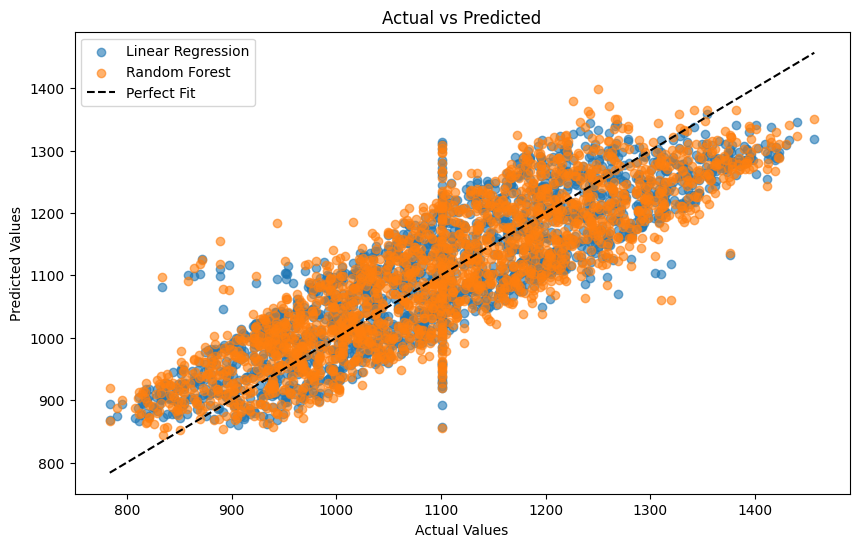

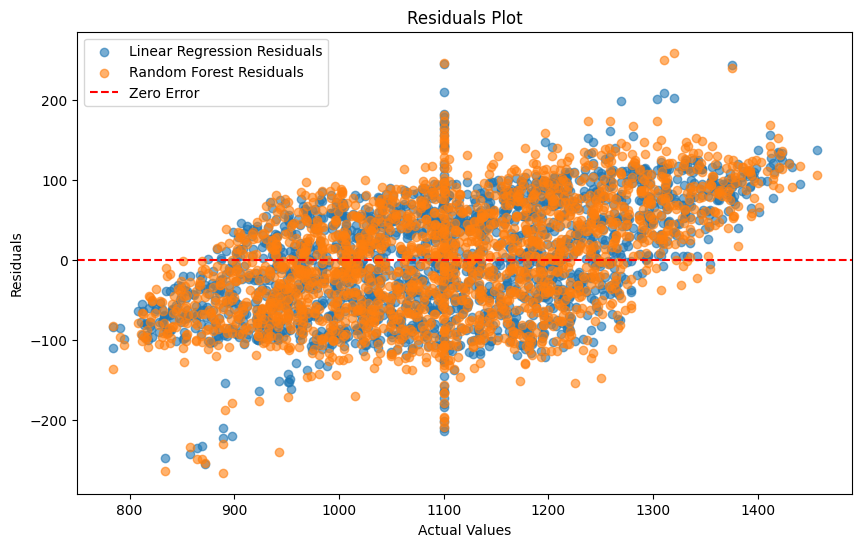

In [11]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_predictions, label="Linear Regression", alpha=0.6)
plt.scatter(y_test, rf_predictions, label="Random Forest", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

# Residuals plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test - lr_predictions, label="Linear Regression Residuals", alpha=0.6)
plt.scatter(y_test, y_test - rf_predictions, label="Random Forest Residuals", alpha=0.6)
plt.axhline(0, color='red', linestyle='--', label="Zero Error")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.legend()
plt.show()